# Welcome to your Deep Learning with Pytorch Tutorial!

In this notebook, we will make a basic deep learning model and get familiar with the computer vision pipeline.

### Learning Objectives:


*   Understand how to build a simple neural network in PyTorch using object-oriented programming (OOP): Learn how to define a custom model class using nn.Module, implement layers in the __init__() method, and specify forward pass logic in the forward() method.
*   Train and evaluate a model for MNIST digit classification: Learn to implement a training loop, use optimizers like Adam, calculate losses using cross-entropy, and evaluate model performance with accuracy and confusion matrices.
*   Visualize and interpret model performance: Understand how to plot loss curves, confusion matrices, and misclassified images to analyze model behavior and identify areas for improvement.

### Structure of This Notebook:


This notebook is designed in a structured and beginner-friendly way to help you learn step by step. It follows a logical progression, with each block of code building on the previous one. Here's how the notebook is organized:

1. **Code Blocks**: Each major part of the tutorial is broken down into individual code blocks. Each block handles a specific task, such as loading data, defining the model, training, validation, and evaluating the model.

2. **Code Descriptions**: After each block of code, there is a detailed explanation that explains what the code does and why it is important.

3. **Visualizations**: Throughout the notebook, several visualizations such as loss curves, confusion matrices, and misclassified images are used to help you understand model performance and where the model might be making mistakes.

4. **FAQs Section**: At the end of the notebook, there is an FAQ section that addresses common questions you may have while working with the code.


### About the Dataset:



*   MNIST (Modified National Institute of Standards and Technology) is a widely-used dataset in machine learning and computer vision.
* It consists of 70,000 grayscale images of handwritten digits (0-9), divided into a training set of 60,000 images and a test set of 10,000 images.
* Each image is 28x28 pixels, making the total number of features per image 784 (28x28).
* The pixel values range from 0 (black) to 255 (white), but they are typically normalized to a range of [0, 1] when used in deep learning models.
*The dataset includes labels corresponding to the digits in the images, ranging from 0 to 9. This makes it a 10-class classification problem.




## Step 1: Importing Libraries

In [2]:
# First, install required libraries (Colab already has PyTorch pre-installed)
!pip install torch torchvision matplotlib scikit-learn seaborn

# Import essential libraries from PyTorch
import torch  # PyTorch's core library for building and training deep learning models
import torch.nn as nn  # Import the neural network module from PyTorch
import torch.optim as optim  # Import optimization algorithms such as SGD, Adam
import torch.nn.functional as F  # Import functional utilities like activation functions

# Import dataset utilities and transformations from torchvision, a library for vision-related tasks
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split  # DataLoader for batching, and random_split for splitting data

# Import additional libraries for data processing and visualization
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # For evaluation metrics


* torch: PyTorch's main module, which provides tensor operations (like NumPy arrays) and deep learning components.
* torch.nn: A submodule used to build neural network layers, like nn.Linear for fully connected layers, nn.Conv2d for convolutional layers, and more.
* torch.optim: Provides optimizers like SGD and Adam, which are algorithms used to update model parameters during training.
* torch.nn.functional: Contains functions like ReLU (activation functions), softmax, loss functions, etc. You can use these functions directly without creating layers.
* datasets, transforms: datasets contains popular datasets like MNIST, CIFAR-10, and more. transforms applies pre-processing transformations like normalization, resizing, etc., to datasets.
* DataLoader: Used to batch the data and make it iterable for training the model. It helps in shuffling and loading data efficiently.
* random_split: Useful for splitting datasets into training, validation, or test sets.
* np: NumPy is a powerful library for numerical computation, often used alongside PyTorch.
* matplotlib.pyplot: A plotting library used for visualizing data such as loss curves, accuracy trends, and more.
* sklearn.metrics: Provides a set of functions to calculate important evaluation metrics such as accuracy, precision, recall, and F1 score.

## Step 2: Setting Random Seed

In [3]:
# Set random seed for reproducibility
torch.manual_seed(42)  # Set the seed for generating random numbers in PyTorch
np.random.seed(42)     # Set the seed for generating random numbers in NumPy

* torch.manual_seed(42): This line sets the random seed for PyTorch's random number generator. By using a specific seed (in this case, 42), you ensure that any random numbers generated by PyTorch (e.g., during weight initialization, dropout, shuffling data) will be the same every time you run the code. This is crucial for reproducibility in experiments.

* np.random.seed(42): Similarly, this line sets the random seed for NumPy's random number generator. This means that any random numbers generated by NumPy will also be consistent across runs, allowing for reproducibility when using NumPy functions.

## Step 3: Device Configuration

In [4]:
# Check if CUDA (GPU support) is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Check if CUDA is available and output the result (True if a GPU is available, False otherwise)
torch.cuda.is_available()


False

* If  a CUDA-enabled GPU is available is, it sets the device to "cuda", which enables the code to run on the GPU. If a GPU isn't available, it defaults to using the CPU ("cpu").
* Using a GPU can significantly speed up the training and inference of deep learning models, as GPUs are optimized for the kind of parallel computations required for neural networks.

## Step 4: Initialize Transform

In [5]:
# Define a transformation pipeline for preprocessing the dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert the images to PyTorch Tensors (from PIL images or NumPy arrays)
])

transforms.Compose([ ... ]): This creates a pipeline of transformations that will be applied to the dataset. In deep learning, it's common to preprocess data before feeding it into a model, and Compose allows you to chain together multiple transformations.


## Step 5: Download Dataset

In [6]:
# Load the MNIST training dataset
train_data = datasets.MNIST(
    root='data',          # Directory to store the dataset
    train=True,           # Set to True to load the training set
    download=True,        # If the dataset isn't already downloaded, download it
    transform=transform   # Apply the transformation (convert images to tensors)
)

# Load the MNIST test dataset
test_data = datasets.MNIST(
    root='data',          # Directory to store the dataset
    train=False,          # Set to False to load the test set
    download=True,        # If the dataset isn't already downloaded, download it
    transform=transform   # Apply the transformation (convert images to tensors)
)

* transform=transform: We apply the transformation pipeline that we defined earlier (i.e., converting images to PyTorch tensors). This ensures the images are in the correct format for model input, and pixel values are normalized.



## Step 6: Train/Validation Split

In [7]:
train_size = int(0.9 * len(train_data))  # 90% of the data will be used for training
val_size = len(train_data) - train_size  # Remaining 10% will be used for validation

# Split the original training data into a new training set and a validation set
train_data, val_data = random_split(train_data, [train_size, val_size])


## Step 7: Dataloader

In [8]:
# Create a DataLoader for the training set
train_loader = DataLoader(
    train_data,  # The training dataset
    batch_size=64,  # Number of samples per batch during training
    shuffle=True  # Shuffle the data at the start of every epoch for better generalization
)

# Create a DataLoader for the validation set
val_loader = DataLoader(
    val_data,  # The validation dataset
    batch_size=64,  # Same batch size as training
    shuffle=False  # No need to shuffle validation data
)

# Create a DataLoader for the test set
test_loader = DataLoader(
    test_data,  # The test dataset
    batch_size=64,  # Same batch size as training
    shuffle=False  # No need to shuffle test data
)

# Print the sizes of the datasets
print(f"Training set size: {train_size}")
print(f"Validation set size: {val_size}")
print(f"Test set size: {len(test_data)}")


Training set size: 54000
Validation set size: 6000
Test set size: 10000


* A DataLoader in PyTorch is responsible for loading data in batches and feeding it to the model. It allows you to handle large datasets more efficiently, as you don't have to load the entire dataset into memory at once.
* Batch Processing: Instead of feeding the model the entire dataset at once, we split the data into "batches" (chunks) of size 64. This allows the model to process a smaller amount of data at a time, making training faster and more memory-efficient.
* shuffle=True: For the training data, we set shuffle=True, which means the data will be randomly shuffled at the start of each epoch (i.e., each complete pass through the training data). This helps to prevent the model from learning the order of the data and encourages better generalization.

## Step 8: Get to Know Your Dataset - Shape

In [9]:
# 1. Print basic dataset info
print(f"Number of training examples: {len(train_data)}")
print(f"Number of testing examples: {len(test_data)}")

# 2. Checking the shape of a single data point (input)
sample_image, sample_label = train_data[0]  # Get first image and label
print(f"Image shape: {sample_image.shape}, Label: {sample_label}")

Number of training examples: 54000
Number of testing examples: 10000
Image shape: torch.Size([1, 28, 28]), Label: 6


* sample_image.shape: This will print the dimensions of the image. Since MNIST images are 28x28 pixels, you should see something like torch.Size([1, 28, 28]). The 1 indicates that it's a single-channel grayscale image (unlike RGB images which have 3 channels).
* sample_label: This will print the label corresponding to the image (for MNIST, it’s a digit between 0-9).

## Step 9: Plot Data Samples

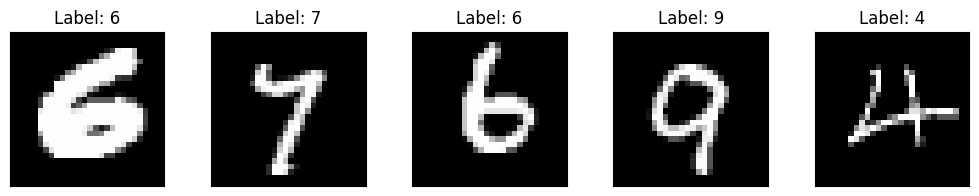

In [10]:
# 3. Display the first 5 data points (images and labels)
fig = plt.figure(figsize=(10, 5))  # Larger figure to display 5 images
for i in range(5):
    image, label = train_data[i]  # Get image and label
    plt.subplot(1, 5, i + 1)
    plt.tight_layout()
    plt.imshow(image[0], cmap='gray', interpolation='none')
    plt.title(f"Label: {label}")
    plt.xticks([])
    plt.yticks([])
plt.show()

## Step 10: Histogram

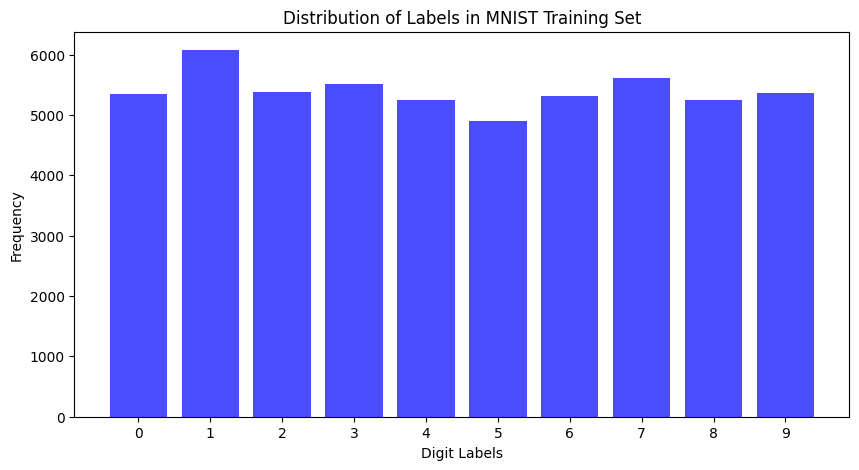

In [11]:
# 4. Show distribution of labels in the training set
labels = [train_data[i][1] for i in range(len(train_data))]  # Extract all labels from the training dataset

# Create a figure for the plot
plt.figure(figsize=(10,5))  # Set the size of the plot to be 10 units wide and 5 units tall

# Plot a histogram of the labels
plt.hist(labels, bins=np.arange(11) - 0.5, rwidth=0.8, color='blue', alpha=0.7)  # Create a histogram of the labels
# bins=np.arange(11) creates bins for digits 0-9, with 0.5 padding for aesthetics
# rwidth=0.8 reduces the width of the bars slightly for spacing
# color='blue' sets the bar color
# alpha=0.7 sets the transparency of the bars (0 is fully transparent, 1 is opaque)

# Add x-ticks for each digit
plt.xticks(np.arange(10))  # Ensure the x-axis ticks are labeled as 0 to 9

# Add title and labels
plt.title('Distribution of Labels in MNIST Training Set')  # Title for the plot
plt.xlabel('Digit Labels')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis (number of occurrences of each label)

# Show the plot
plt.show()  # Display the plot


## Step 11: Data Type

In [12]:
# Print the data type of the image (to verify it's a torch.Tensor)
print(f"Data type: {sample_image.dtype}")

# Print the pixel value range for the image (to ensure it is normalized)
print(f"Pixel range after normalization: Min = {sample_image.min()}, Max = {sample_image.max()}")


Data type: torch.float32
Pixel range after normalization: Min = 0.0, Max = 1.0


## Step 12: Creating a Model

In [13]:

# Define the OOP Model class inheriting from nn.Module
class MNISTModel(nn.Module):
    def __init__(self):
        super(MNISTModel, self).__init__()  # Call the parent class's constructor

        # Define the layers of the model

        # 1. Fully connected (Linear) layer that takes 28x28 pixel input and maps it to 128 units
        self.fc1 = nn.Linear(28 * 28, 128)

        # 2. Another fully connected layer that reduces the 128 units to 64 units
        self.fc2 = nn.Linear(128, 64)

        # 3. Output layer that maps the 64 units to 10 units (corresponding to the 10 classes in MNIST)
        self.fc3 = nn.Linear(64, 10)

        # Define the activation function - ReLU (Rectified Linear Unit)
        self.relu = nn.ReLU()  # ReLU introduces non-linearity after each layer

    # Define the forward pass (how data flows through the network)
    def forward(self, x):
        # Flatten the input tensor from (batch_size, 1, 28, 28) to (batch_size, 784)
        x = x.view(-1, 28 * 28)  # -1 means batch size will be inferred automatically

        # Pass data through the first layer and apply ReLU activation
        x = self.relu(self.fc1(x))

        # Pass data through the second layer and apply ReLU activation
        x = self.relu(self.fc2(x))

        # Pass data through the output layer (no activation here; it's handled by the loss function later)
        x = self.fc3(x)

        return x  # Return the output (logits)


* The model class MNISTModel inherits from nn.Module, which is the base class for all models in PyTorch. It ensures that the custom model behaves like a PyTorch neural network.
* Fully Connected Layers (nn.Linear): These layers perform linear transformations on the input. The first layer fc1 takes the flattened input (28×28 pixels = 784 features) and maps it to 128 hidden units. The second layer fc2 reduces these 128 units to 64. Finally, the third layer fc3 produces 10 outputs, corresponding to the 10 digit classes (0 to 9).
* Activation Function (ReLU): The ReLU (Rectified Linear Unit) function introduces non-linearity into the model. Without it, the model would behave like a simple linear function, limiting its ability to learn complex patterns. ReLU helps the model learn more intricate relationships in the data.
* The forward function defines how the data flows through the model.
* Flattening: The input image, which is originally a 2D 28×28 grid, is flattened into a 1D array with 784 elements.
* Layer 1: The flattened image is passed through the first fully connected layer (fc1), which transforms it into 128 features. The ReLU activation is then applied.
* Layer 2: The output from the first layer is passed to the second fully connected layer (fc2), which reduces the 128 features to 64, followed by ReLU activation.
* Output Layer: The 64 features are passed to the final output layer (fc3), which produces 10 output values (logits). These logits represent the raw scores for each class, which will be processed later by the loss function (e.g., cross-entropy).


## Step 13:

In [14]:
# Instantiate the OOP model
oop_model = MNISTModel().to(device)  # Move the model to the device (GPU/CPU)

## Step 14:

In [15]:
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
oop_model.to(device)

MNISTModel(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)

## Step 15: Initiate the Model

In [16]:
# Define Loss and Optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(oop_model.parameters(), lr=0.001)

## Step 16: Print Model

In [17]:
print(oop_model)

MNISTModel(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)


## Step 17: Train Function

In [18]:
# Modified training loop to return average training loss for each epoch
def train_model(model, device, train_loader, optimizer, loss_fn):
    model.train()  # Set the model to training mode (activates dropout and batch normalization)
    running_loss = 0.0  # Initialize a variable to keep track of the cumulative loss for the epoch

    # Iterate over batches of data from the training set
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)  # Move data and target to the appropriate device (GPU/CPU)

        # Zero the gradients for the optimizer
        optimizer.zero_grad()

        # Forward pass: compute predicted outputs by passing data through the model
        output = model(data)

        # Calculate the loss between the predicted outputs and the true labels
        loss = loss_fn(output, target)

        # Backward pass: compute gradients of the loss with respect to model parameters
        loss.backward()

        # Update the model weights based on the computed gradients
        optimizer.step()

        running_loss += loss.item()  # Accumulate the loss for the current batch

    # Compute the average loss for the entire epoch
    avg_train_loss = running_loss / len(train_loader)
    return avg_train_loss  # Return the average training loss for this epoch

# Train the model by calling the train_model function
train_model(oop_model, device, train_loader, optimizer, loss_fn)


0.3432202906043256

* model.train(): This sets the model to training mode. In this mode, layers like dropout and batch normalization behave differently (e.g., dropout is activated).
* running_loss = 0.0: A variable to accumulate the loss for each batch, which will later help compute the average loss for the epoch.
* for batch_idx, (data, target) in enumerate(train_loader): This loop goes through each batch of data from the train_loader. Each data contains input images, and target contains the corresponding labels.
* data, target = data.to(device), target.to(device): This moves both the input data and the labels to the device specified (GPU or CPU).
* optimizer.zero_grad(): Before the backward pass, gradients need to be zeroed to prevent accumulation from previous iterations.
* output = model(data): The input data is passed through the model to get the predicted outputs.
* loss = loss_fn(output, target): The loss function computes the difference between the predicted outputs and the true labels.
*loss.backward(): This computes the gradient of the loss with respect to the model parameters (weights).
* optimizer.step(): The optimizer updates the model parameters based on the computed gradients.
* running_loss += loss.item(): This adds the current batch's loss to the running total.
* avg_train_loss = running_loss / len(train_loader): After all batches have been processed, the average loss for the epoch is calculated.
* return avg_train_loss: The function returns the average training loss, which can be useful for monitoring training progress.


## Step 18: Validation Function

In [19]:
# Validation function
def validate_model(model, device, val_loader, loss_fn):
    model.eval()  # Set the model to evaluation mode (disables dropout and batch normalization)
    val_loss = 0.0  # Variable to accumulate validation loss
    correct = 0  # Counter for the number of correct predictions
    all_preds = []  # List to store all predicted labels
    all_labels = []  # List to store all true labels

    with torch.no_grad():  # Disable gradient computation during validation for efficiency
        for data, target in val_loader:  # Iterate through the validation data
            data, target = data.to(device), target.to(device)  # Move data and target to the appropriate device
            output = model(data)  # Forward pass: compute predicted outputs by passing data through the model
            val_loss += loss_fn(output, target).item()  # Accumulate validation loss

            # Get predictions by finding the index of the maximum log-probability
            pred = output.argmax(dim=1, keepdim=True)  # Get the predicted class labels
            correct += pred.eq(target.view_as(pred)).sum().item()  # Count correct predictions
            all_preds.extend(pred.cpu().numpy())  # Store predicted labels
            all_labels.extend(target.cpu().numpy())  # Store true labels

    # Compute average loss and accuracy for validation
    avg_val_loss = val_loss / len(val_loader)  # Average validation loss
    accuracy = 100. * correct / len(val_loader.dataset)  # Accuracy as a percentage

    return avg_val_loss, accuracy  # Return average validation loss and accuracy


* model.eval(): This sets the model to evaluation mode. In this mode, layers like dropout and batch normalization will not apply their regularization effects, allowing for stable predictions.

* val_loss = 0.0: This variable accumulates the total validation loss.
correct = 0: A counter to keep track of the number of correct predictions.

* all_preds and all_labels: Lists to store predicted and true labels, respectively, which can be used for further evaluation metrics.

* with torch.no_grad(): This context manager disables gradient calculation, which is unnecessary during validation and saves memory and computation.

* for data, target in val_loader: This loop iterates through each batch of validation data.

* data, target = data.to(device), target.to(device): Both input data and target labels are moved to the specified device (GPU or CPU).

* output = model(data): The model generates predictions by processing the input data.

* val_loss += loss_fn(output, target).item(): The loss for the current batch is calculated and added to the total validation loss.

* pred = output.argmax(dim=1, keepdim=True): The predicted class labels are obtained by finding the index of the maximum value along the specified dimension.

* correct += pred.eq(target.view_as(pred)).sum().item(): The number of correct predictions is updated by comparing predicted labels with true labels.

* all_preds.extend(pred.cpu().numpy()): The predicted labels are added to the list of all predictions.

* all_labels.extend(target.cpu().numpy()): The true labels are added to the list of all true labels.

* avg_val_loss = val_loss / len(val_loader): The average validation loss is calculated.

* accuracy = 100. * correct / len(val_loader.dataset): The accuracy is calculated as a percentage of correct predictions out of total validation samples.

* return avg_val_loss, accuracy: The function returns the average validation loss and accuracy.

## Step 19: Test Function

In [20]:
# Testing function
def test_model(model, device, test_loader, loss_fn):
    model.eval()  # Set the model to evaluation mode (disables dropout and batch normalization)
    test_loss = 0.0  # Variable to accumulate total test loss
    correct = 0  # Counter for the number of correct predictions

    with torch.no_grad():  # Disable gradient computation during testing for efficiency
        for data, target in test_loader:  # Iterate over the test dataset
            data, target = data.to(device), target.to(device)  # Move data and target to the appropriate device
            output = model(data)  # Forward pass: compute predicted outputs by passing data through the model
            test_loss += loss_fn(output, target).item()  # Accumulate test loss

            # Get predictions by finding the index of the maximum log-probability
            pred = output.argmax(dim=1, keepdim=True)  # Get the predicted class labels
            correct += pred.eq(target.view_as(pred)).sum().item()  # Count correct predictions

    # Compute average loss and accuracy for the test set
    test_loss /= len(test_loader)  # Average test loss
    accuracy = 100. * correct / len(test_loader.dataset)  # Accuracy as a percentage

    # Print test loss and accuracy
    print(f'Test Loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({accuracy:.2f}%)')

    return test_loss, accuracy  # Return average test loss and accuracy

# Evaluate the OOP model
print("\nEvaluating OOP Model:")
test_model(oop_model, device, test_loader, loss_fn)



Evaluating OOP Model:
Test Loss: 0.1806, Accuracy: 9465/10000 (94.65%)


(0.18055043441901922, 94.65)

* model.eval(): This sets the model to evaluation mode. This is important because it ensures that layers like dropout and batch normalization are functioning correctly for evaluation.

* test_loss = 0.0: This variable accumulates the total test loss across all batches.

* correct = 0: A counter to keep track of the number of correct predictions made by the model.

* with torch.no_grad(): This context manager disables gradient calculation, which is unnecessary during testing, saving memory and computational resources.

* for data, target in test_loader: This loop iterates through each batch of test data.

* data, target = data.to(device), target.to(device): The input data and true labels are moved to the specified device (GPU or CPU) for processing.

* output = model(data): The model generates predictions by processing the input data.

* test_loss += loss_fn(output, target).item(): The loss for the current batch is calculated using the specified loss function and added to the total test loss.

* pred = output.argmax(dim=1, keepdim=True): The predicted class labels are obtained by finding the index of the maximum value along the specified dimension (usually the class scores).

* correct += pred.eq(target.view_as(pred)).sum().item(): The number of correct predictions is updated by comparing the predicted labels with the true labels.

* test_loss /= len(test_loader): The average test loss is calculated by dividing the total loss by the number of batches in the test loader.
accuracy = 100. * correct / len(test_loader.dataset): The accuracy is calculated as a percentage of correct predictions out of total test samples.

## Step 20: Execution of Training Function

In [21]:
# Training and validation loop with validation set
def train_and_evaluate(model, device, train_loader, val_loader, test_loader, optimizer, loss_fn, epochs=5):
    # Lists to store losses and accuracies
    train_losses = []  # To track training losses over epochs
    val_losses = []    # To track validation losses over epochs
    val_accuracies = []  # To track validation accuracies over epochs
    test_losses = []   # To track test losses after training
    test_accuracies = []  # To track test accuracies after training

    # Loop over the number of epochs
    for epoch in range(epochs):
        print(f"\nEpoch {epoch + 1}/{epochs}")

        # Train the model and get training loss
        train_loss = train_model(model, device, train_loader, optimizer, loss_fn)  # Call the training function
        train_losses.append(train_loss)  # Store the training loss

        # Validate the model and get validation loss and accuracy
        val_loss, val_accuracy = validate_model(model, device, val_loader, loss_fn)  # Call the validation function
        val_losses.append(val_loss)  # Store the validation loss
        val_accuracies.append(val_accuracy)  # Store the validation accuracy

        # Test the model and get test loss and accuracy (only for test set evaluation)
        test_loss, test_accuracy = test_model(model, device, test_loader, loss_fn)  # Call the testing function
        test_losses.append(test_loss)  # Store the test loss
        test_accuracies.append(test_accuracy)  # Store the test accuracy

        # Print training and validation results for the current epoch
        print(f"Training Loss: {train_loss:.4f}")
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")
        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    # Return all recorded losses and accuracies for further analysis
    return train_losses, val_losses, val_accuracies, test_losses, test_accuracies


## Step 21: Running Everything Together!

In [22]:
# Example usage for 5 epochs (replace train_loader, val_loader, and test_loader with actual loaders)
epochs = 5  # Set the number of epochs for training

# Track training, validation, and test results
train_losses, val_losses, val_accuracies, test_losses, test_accuracies = train_and_evaluate(
    oop_model,  # The model to be trained and evaluated
    device,  # The device (CPU or GPU) where the model will run
    train_loader,  # DataLoader for training data
    val_loader,  # DataLoader for validation data
    test_loader,  # DataLoader for test data
    optimizer,  # Optimizer to update model weights
    loss_fn,  # Loss function to compute the loss
    epochs=epochs  # Number of epochs to train for
)

# After training, you can analyze the recorded losses and accuracies



Epoch 1/5
Test Loss: 0.1203, Accuracy: 9623/10000 (96.23%)
Training Loss: 0.1448
Validation Loss: 0.1395, Validation Accuracy: 95.70%
Test Loss: 0.1203, Test Accuracy: 96.23%

Epoch 2/5
Test Loss: 0.0971, Accuracy: 9696/10000 (96.96%)
Training Loss: 0.0989
Validation Loss: 0.1103, Validation Accuracy: 96.73%
Test Loss: 0.0971, Test Accuracy: 96.96%

Epoch 3/5
Test Loss: 0.0945, Accuracy: 9712/10000 (97.12%)
Training Loss: 0.0772
Validation Loss: 0.1053, Validation Accuracy: 96.78%
Test Loss: 0.0945, Test Accuracy: 97.12%

Epoch 4/5
Test Loss: 0.1002, Accuracy: 9701/10000 (97.01%)
Training Loss: 0.0608
Validation Loss: 0.1166, Validation Accuracy: 96.43%
Test Loss: 0.1002, Test Accuracy: 97.01%

Epoch 5/5
Test Loss: 0.0867, Accuracy: 9734/10000 (97.34%)
Training Loss: 0.0482
Validation Loss: 0.1044, Validation Accuracy: 96.73%
Test Loss: 0.0867, Test Accuracy: 97.34%


## Step 22: Loss Curves

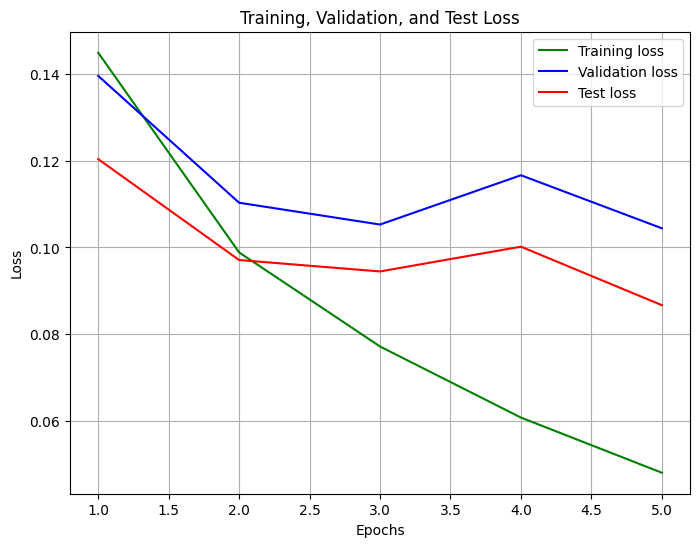

In [23]:
# Plot the loss curves for training, validation, and test sets
epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_losses, 'g', label='Training loss')
plt.plot(epochs, val_losses, 'b', label='Validation loss')
plt.plot(epochs, test_losses, 'r', label='Test loss')
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Step 23: Confusion Matrix

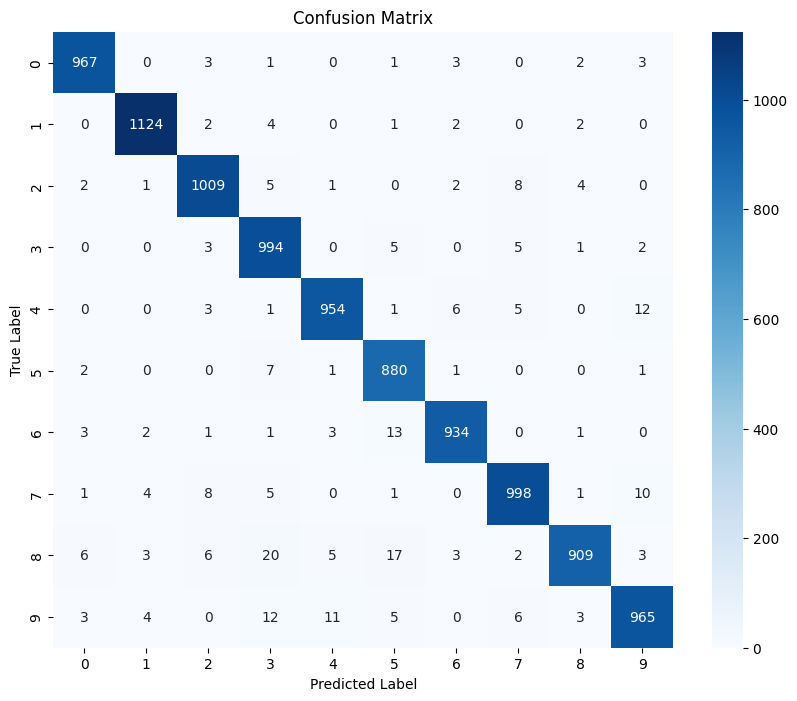

In [24]:
# Import necessary libraries for metrics and visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# After testing the model, get all predictions and true labels
all_preds = []  # List to store all predicted labels
all_labels = []  # List to store all true labels

# Set the model to evaluation mode
oop_model.eval()
with torch.no_grad():  # Disable gradient calculation for evaluation
    for data, labels in test_loader:  # Iterate over the test data loader
        data, labels = data.to(device), labels.to(device)  # Move data and labels to the device (GPU/CPU)

        output = oop_model(data)  # Get model predictions
        _, preds = torch.max(output, 1)  # Get the predicted labels (index of max logit)

        # Extend the lists with predictions and true labels
        all_preds.extend(preds.cpu().numpy())  # Move predictions to CPU and convert to numpy
        all_labels.extend(labels.cpu().numpy())  # Move true labels to CPU and convert to numpy

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)  # Generate confusion matrix from true and predicted labels

# Plot using seaborn heatmap
plt.figure(figsize=(10, 8))  # Create a new figure with specified size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',  # Create a heatmap for the confusion matrix
            xticklabels=range(10), yticklabels=range(10))  # Set x and y tick labels for classes
plt.title('Confusion Matrix')  # Title of the plot
plt.xlabel('Predicted Label')  # Label for the x-axis
plt.ylabel('True Label')  # Label for the y-axis
plt.show()  # Display the plot


## Step 24: Plotting Misclassified Images (optional)

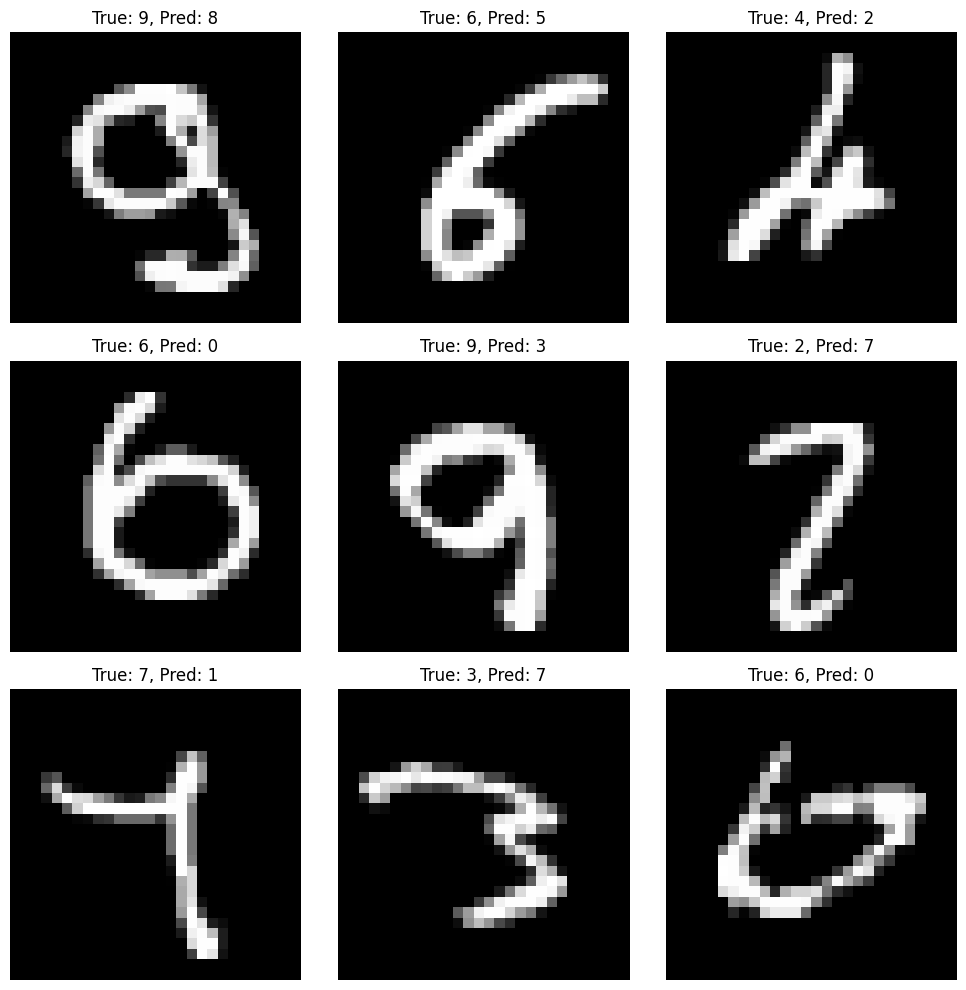

In [25]:
# Initialize lists to store misclassified images, true labels, and predicted labels
misclassified_images = []  # To store images that were misclassified
misclassified_labels = []   # To store true labels of misclassified images
misclassified_preds = []    # To store predicted labels of misclassified images

# Set the model to evaluation mode to ensure layers behave correctly during inference
oop_model.eval()
with torch.no_grad():  # Disable gradient calculation for inference
    # Iterate over the test data loader
    for data, labels in test_loader:
        data, labels = data.to(device), labels.to(device)  # Move data and labels to the appropriate device
        output = oop_model(data)  # Get model predictions

        # Get the predicted class by taking the index of the maximum logit
        _, preds = torch.max(output, 1)

        # Loop through the data, labels, and predictions
        for img, label, pred in zip(data, labels, preds):
            # Check if the predicted label does not match the true label
            if label != pred:
                # If misclassified, store the image and its corresponding labels
                misclassified_images.append(img.cpu())  # Move image to CPU for storage
                misclassified_labels.append(label.cpu())  # Move true label to CPU for storage
                misclassified_preds.append(pred.cpu())  # Move predicted label to CPU for storage

# Visualize some of the misclassified images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))  # Create a 3x3 grid of subplots
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Iterate over the first 9 misclassified images
for img, label, pred, ax in zip(misclassified_images[:9], misclassified_labels[:9], misclassified_preds[:9], axes):
    img = img.squeeze()  # Remove unnecessary dimensions (1, 28, 28) -> (28, 28)
    ax.imshow(img, cmap='gray')  # Display the image in grayscale
    ax.set_title(f"True: {label}, Pred: {pred}")  # Set the title with true and predicted labels
    ax.axis('off')  # Hide axes for better visualization

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot


## Frequently Asked Questions (FAQs)

**On Step 1**

Why use PyTorch?


1.   PyTorch is well-known for its tensor operations, which are similar to NumPy arrays but support GPU acceleration.
2.   Dynamic Computational Graphs: Unlike TensorFlow (with static computation graphs), PyTorch allows dynamic graphs, making it easier to debug and work with.

Why torchvision?

PyTorch's torchvision library provides utilities specifically designed for computer vision tasks. This includes standardized datasets (e.g., MNIST, CIFAR-10), pre-trained models, and image transformation pipelines.

**On Step 2**

Why is setting a random seed important?

Setting a random seed is a best practice in machine learning and deep learning because it allows you (and others) to reproduce the exact results of an experiment. This is particularly important for debugging, sharing code, and comparing results across different runs.

**On Step 3**

What is CUDA?

CUDA (Compute Unified Device Architecture) is a parallel computing platform and API model created by NVIDIA. It allows programs to use the power of NVIDIA GPUs for general-purpose computing. GPUs can perform many operations simultaneously, making them extremely efficient for tasks like matrix multiplication, which are common in deep learning.

**On Step 4**

Why do we convert images to a Tensor?:

PyTorch models cannot work directly with images in formats like PIL or NumPy arrays. They need the data to be in the form of a Tensor so that operations like matrix multiplication, backpropagation, and optimization can be applied.Tensors also support efficient computation on GPUs, allowing the model to leverage parallel processing during training.

**On Step 5**

Why do we need a separate test dataset?


The test dataset is used to evaluate how well the model performs on data it hasn't seen during training. This helps in checking the generalization ability of the model, ensuring it can work on real-world, unseen data.

Why is the dataset downloaded via code?

Datasets like MNIST are large and not included by default with every PyTorch installation. By downloading the dataset dynamically, we ensure the necessary files are available without manual effort.

**On Step 6+7**

Why is batch size important?

Batch size affects the memory usage and the speed of training. Smaller batch sizes lead to more updates to the model weights (which can help with convergence), while larger batch sizes can make training faster but may require more memory.


Why do we shuffle the training data but not the validation/test data?

Shuffling the training data helps prevent the model from learning the order of the data. For validation and testing, we don't shuffle because we want consistent and repeatable results when evaluating performance.

**On Step 8**

Why is it important to know the shape of the input image?

The shape of the input image must match what the model expects. For example, if your model is designed to take a 28x28 pixel image as input, feeding it a differently sized image will cause errors. Understanding input dimensions helps you avoid these issues.

Why is the label important?

The label is the correct digit that corresponds to the image. During training, the model uses this label to calculate the error between its prediction and the true value. This error is then used to update the model’s weights.

**On Step 9+10**

What would happen if the dataset were imbalanced?

In an imbalanced dataset, the model might become biased toward predicting the more frequent classes, resulting in poor performance on the less frequent classes. This is why visualizing the label distribution is useful in identifying and addressing class imbalance early.

Why use transparency (alpha=0.7) for the bars?

The transparency makes the plot visually lighter and can help when overlaying multiple histograms on the same plot (which can be useful for comparison in other tasks).

**On Step 11**

Why is normalization critical for model performance?

Normalization prevents large variations in pixel values from negatively affecting model training. It ensures that gradients remain manageable and that the model can learn efficiently.

What happens if the data isn’t normalized?

If the data isn't normalized, the learning process can become erratic. Large values might cause gradient explosions, while small values might result in very small updates to the model weights, slowing down learning.

**On Step 12+13**

Why do we flatten the input?

Since the fully connected layers expect a 1D input, we need to convert the 2D image (28×28 pixels) into a 1D array (784 elements). This flattening ensures compatibility with the linear layers.

Why don't we apply activation functions in the output layer?

The final output is passed to a loss function (like cross-entropy loss) which expects raw logits. The loss function will handle converting the logits into probabilities (e.g., via softmax), so we don’t apply an activation function directly in the output layer.

What is the role of nn.Module?

nn.Module is the base class in PyTorch for all models. It helps handle things like parameter management, moving models between devices, and defining custom layers and behavior for your model.


What is the __init__() method and why is it important?


The __init__() method sets up the model’s architecture by defining the layers that will be used in the neural network. This ensures that when we instantiate the model (oop_model = MNISTModel()), all the necessary layers are initialized and ready to be used in the forward pass.


What is self.fc1, self.fc2, and self.fc3?

self.fc1 defines the first fully connected layer, which takes the flattened input (784 pixels) and maps it to 128 features. Similarly, self.fc2 and self.fc3 define the second and output layers, mapping from 128 to 64 features, and finally from 64 features to 10 output classes (digits 0–9).


What is the forward() function?

The forward() function, we specify how the data is transformed layer by layer. The data is first flattened (since fully connected layers require 1D input) and then passed through fc1, fc2, and fc3 with ReLU activations between the layers. This process outputs logits, which are the unnormalized predictions for each class.

Why do we flatten the input using x.view(-1, 28 * 28)?

Flattening the input reshapes the 2D image (28×28) into a 1D array of 784 elements. This is necessary because fully connected layers operate on vectors, not matrices.

What does to(device) do?

to(device) moves the model to either the GPU or CPU, depending on which device is available. This is crucial because computations on a GPU can drastically speed up training, especially for large models or datasets.

**On Step 14**

What happens if I try to use the model without moving it to the appropriate device?

If the model is not moved to the same device as the input data, you will encounter an error indicating that the tensors are on different devices. Both the model and the data must be on the same device (either both on CPU or both on GPU) for operations to be performed.

Can I use multiple GPUs?

Yes, PyTorch supports multi-GPU training using torch.nn.DataParallel or torch.nn.parallel.DistributedDataParallel. This allows you to distribute your training workload across multiple GPUs, further speeding up the training process.

**On Step 15**

Why do we need an optimizer in deep learning?

The optimizer is responsible for updating the model's weights to minimize the loss function, helping the model learn and improve its predictions over time. Without an optimizer, the model wouldn't know how to adjust its parameters to reduce error.

Why choose Adam over other optimizers like SGD?

Adam typically converges faster than SGD and doesn’t require as much fine-tuning of the learning rate. It also performs well on many different types of tasks, making it a popular choice.

How do we decide which learning rate to use?

The learning rate is usually chosen based on experimentation. A too-high learning rate can cause the model to overshoot the optimal solution, while a too-low learning rate can make training very slow. Starting with 0.001 for Adam is often a good initial choice, and then it can be tuned further.

**On Step 16**

Why is it helpful to visualize the model architecture?

Visualizing the architecture helps you understand the flow of data through the model, the types of operations being performed, and how the final output is produced. This is important for both design and debugging.

**On Step 17**

Why do we zero the gradients before the backward pass?

Gradients are accumulated by default in PyTorch. If we do not zero them, the gradients from the previous batches will be added to the current batch's gradients, leading to incorrect updates.

Can I modify this training loop for different tasks?

Yes, the training loop can be adjusted for various tasks (e.g., regression instead of classification) by changing the loss function and potentially the model architecture.

**On Step 18**

Why do we calculate both loss and accuracy during validation?

Loss gives a measure of how well the model's predictions match the true labels, while accuracy provides a straightforward metric of how many predictions were correct. Both metrics are important to understand the model's performance comprehensively.

Can I use the validation set to tune hyperparameters?

Yes, the validation set is commonly used for hyperparameter tuning and model selection. However, it should not be used for training the model itself to avoid leakage of information.

What should I do if my validation accuracy is much lower than my training accuracy?

This may indicate overfitting. You can try regularization techniques, increase the training dataset size, or adjust the model architecture to improve generalization.

**On Step 19**

What should I look for in the test loss and accuracy values?

Ideally, you want low test loss and high accuracy. If test loss is high or accuracy is low compared to training performance, it may indicate issues like overfitting.

**On Step 20**

Why is it important to validate the model during training?

Validation helps track the model's performance on unseen data during training, allowing you to make adjustments and prevent overfitting before reaching the final test.

What should I do if the validation accuracy does not improve?

You might need to try different techniques such as adjusting the learning rate, changing the model architecture, or applying regularization methods to help improve validation accuracy.

**On Step 21**

How do I decide the number of epochs?

Start with a small number (like 5-10) and increase it if your validation loss and accuracy continue to improve. Use early stopping techniques to prevent overfitting.

What if the model performs poorly on the validation set?

Poor validation performance can indicate overfitting. Consider regularization techniques, hyperparameter tuning, or revisiting your model architecture.



**On Step 22**

What should I do if I see a significant gap between training and validation loss?

A large gap usually indicates overfitting. You might consider techniques like regularization, dropout, or obtaining more training data.

How can I tell if my model is underfitting?

If both training and validation losses remain high, your model might be too simple to capture the underlying patterns in the data. Consider increasing model complexity or training for more epochs.


**On Step 23**

Why do we use torch.no_grad() when evaluating the model?

This context manager disables gradient tracking, which reduces memory consumption and speeds up computations since we don’t need to compute gradients for backpropagation during evaluation.

What do the values in the confusion matrix represent?

Each cell in the confusion matrix represents the number of predictions made by the model for the actual classes. The diagonal cells represent correct predictions, while off-diagonal cells represent misclassifications.

**On Step 24**

Why do we use img.cpu() when storing misclassified images?

This is necessary because the images are initially on the GPU. Moving them to the CPU ensures that they can be stored in a list and visualized later without any device compatibility issues.

How can this analysis be used for further improvements?

Misclassifications can indicate specific digits that the model struggles with. By analyzing these cases, you can augment training data for these classes, modify your model architecture, or apply techniques like transfer learning to improve performance.

## Resources

* https://pytorch.org/tutorials/beginner/pytorch_with_examples.html
* https://docs.determined.ai/0.27.0/tutorials/pytorch-mnist-tutorial.html